# Algoritmo de Clustering (KMeans)

## Importar las librerias a utilizar

In [1]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

## Importar el data frame

In [2]:
path = 'C:/Users/Rodolfo/Documents/Trabajo Final Delfin 2018/Limpieza de datos/Limpieza eliminado las columas(p3, upm y con)/Modo individual/vivt_lim114.csv'
df_alg_lim111 = pd.read_csv(path, low_memory = False, encoding='latin')
df_alg_lim111.head()

,Unnamed: 0,loc,mun,est,est_d,t_loc,cd_a,ent,d_sem,n_pro_viv,v_sel,n_ent,per,p1,p2,ur,fac
0,0,1,1,30,2,1,14,1,101,28,1,1,114,3,1,1,106
1,1,1,1,30,2,1,14,1,101,60,2,1,114,5,1,1,106
2,2,1,1,30,2,1,14,1,101,93,3,1,114,6,1,1,106
3,3,1,1,30,2,1,14,1,101,127,4,1,114,3,1,1,106
4,4,1,1,30,2,1,14,1,101,161,5,1,114,6,1,1,106


## Eliminar columnas sin utilidad

In [3]:
df_alg_lim111.drop(df_alg_lim111.columns[df_alg_lim111.columns.str.contains('unnamed',case = False)],axis = 1)

,loc,mun,est,est_d,t_loc,cd_a,ent,d_sem,n_pro_viv,v_sel,n_ent,per,p1,p2,ur,fac
0,1,1,30,2,1,14,1,101,28,1,1,114,3,1,1,106
1,1,1,30,2,1,14,1,101,60,2,1,114,5,1,1,106
2,1,1,30,2,1,14,1,101,93,3,1,114,6,1,1,106
3,1,1,30,2,1,14,1,101,127,4,1,114,3,1,1,106
4,1,1,30,2,1,14,1,101,161,5,1,114,6,1,1,106
5,1,1,30,2,1,14,1,101,114,1,1,114,5,1,1,105
6,1,1,30,2,1,14,1,101,24,2,1,114,2,1,1,105
7,1,1,30,2,1,14,1,101,46,3,1,114,3,1,1,105
8,1,1,30,2,1,14,1,101,69,4,1,114,5,1,1,105
9,1,1,30,2,1,14,1,101,91,5,1,114,4,1,1,105


## Normalizar los datos

In [4]:
df_alg_lim111 = sk.preprocessing.normalize(df_alg_lim111, norm='l2', axis=1, copy=True)

## Crear un nuevo data frame ya normalizado

In [5]:
df_alg_lim111_norm = pd.DataFrame(df_alg_lim111)

In [6]:
df_alg_lim111_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.005246,0.005246,0.157385,0.010492,0.005246,0.073447,0.005246,0.529864,0.146893,0.005246,0.005246,0.598065,0.015739,0.005246,0.005246,0.556095
1,0.005053,0.005053,0.005053,0.151581,0.010105,0.005053,0.070738,0.005053,0.510322,0.303162,0.010105,0.005053,0.576007,0.025263,0.005053,0.005053,0.535586
2,0.009509,0.004754,0.004754,0.142634,0.009509,0.004754,0.066563,0.004754,0.480202,0.442166,0.014263,0.004754,0.542010,0.028527,0.004754,0.004754,0.503974
3,0.013194,0.004398,0.004398,0.131936,0.008796,0.004398,0.061570,0.004398,0.444185,0.558529,0.017591,0.004398,0.501357,0.013194,0.004398,0.004398,0.466174
4,0.016125,0.004031,0.004031,0.120934,0.008062,0.004031,0.056436,0.004031,0.407146,0.649014,0.020156,0.004031,0.459550,0.024187,0.004031,0.004031,0.427301


In [7]:
df_alg_lim111_norm.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
dtype: object

## Metodo Elbow

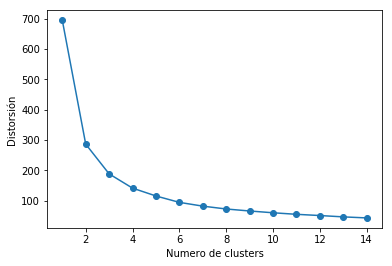

In [8]:
distortions = []

for i in range(1,15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_alg_lim111_norm)
    distortions.append(km.inertia_)

plt.plot(range(1,15), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [9]:
clusters = KMeans(n_clusters=5,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)  

#print(np.unique(clusters.fit_predict(X)))

In [10]:
y_km = clusters.fit_predict(df_alg_lim111_norm)
y_km

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
y_km.min()

0

## Aplicar el metodo de KMeans

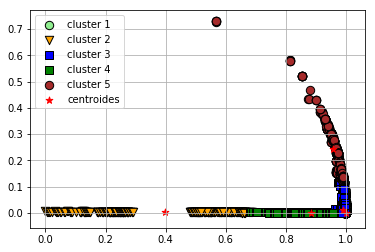

In [12]:
plt.scatter(df_alg_lim111[y_km==0,0],
          df_alg_lim111[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_alg_lim111[y_km==1,0],
          df_alg_lim111[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_alg_lim111[y_km==2,0],
          df_alg_lim111[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(df_alg_lim111[y_km==3,0],
          df_alg_lim111[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(df_alg_lim111[y_km==4,0],
          df_alg_lim111[y_km==4,1],
          s=70,
          c='brown',
          edgecolor='black',
          marker='o',
          label='cluster 5')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

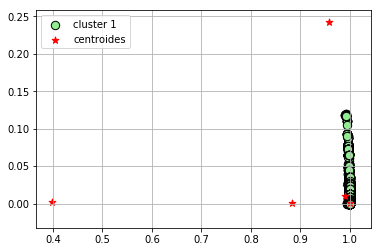

In [13]:
plt.scatter(df_alg_lim111[y_km==0,0],
          df_alg_lim111[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

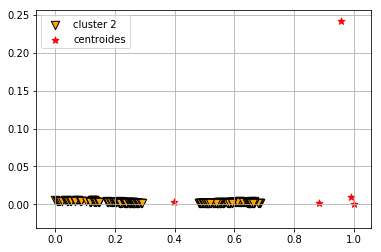

In [14]:
plt.scatter(df_alg_lim111[y_km==1,0],
          df_alg_lim111[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

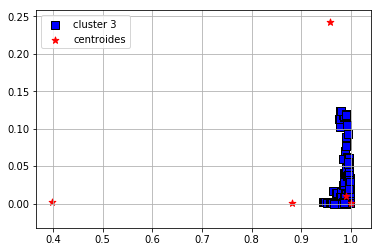

In [15]:
plt.scatter(df_alg_lim111[y_km==2,0],
          df_alg_lim111[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

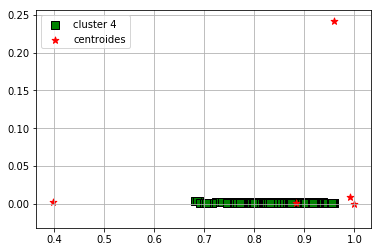

In [16]:
plt.scatter(df_alg_lim111[y_km==3,0],
          df_alg_lim111[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

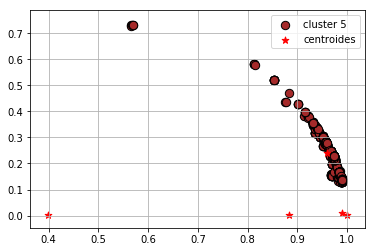

In [17]:
plt.scatter(df_alg_lim111[y_km==4,0],
          df_alg_lim111[y_km==4,1],
          s=70,
          c='brown',
          edgecolor='black',
          marker='o',
          label='cluster 5')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

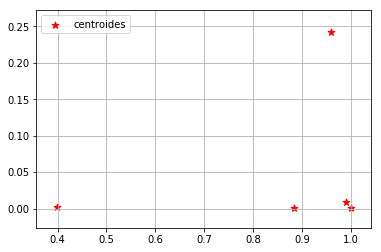

In [18]:
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [21]:
df_alg_lim111_1 = df_alg_lim111.copy()

In [23]:
df_alg_lim111_1 = pd.DataFrame(df_alg_lim111)

In [25]:
df_alg_lim111_1["Cluster"] = y_km

In [26]:
df_alg_lim111_1.shape

(425426, 18)

In [27]:
df_alg_lim111_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Cluster
0,0.000000,0.005246,0.005246,0.157385,0.010492,0.005246,0.073447,0.005246,0.529864,0.146893,0.005246,0.005246,0.598065,0.015739,0.005246,0.005246,0.556095,1
1,0.005053,0.005053,0.005053,0.151581,0.010105,0.005053,0.070738,0.005053,0.510322,0.303162,0.010105,0.005053,0.576007,0.025263,0.005053,0.005053,0.535586,1
2,0.009509,0.004754,0.004754,0.142634,0.009509,0.004754,0.066563,0.004754,0.480202,0.442166,0.014263,0.004754,0.542010,0.028527,0.004754,0.004754,0.503974,1
3,0.013194,0.004398,0.004398,0.131936,0.008796,0.004398,0.061570,0.004398,0.444185,0.558529,0.017591,0.004398,0.501357,0.013194,0.004398,0.004398,0.466174,1
4,0.016125,0.004031,0.004031,0.120934,0.008062,0.004031,0.056436,0.004031,0.407146,0.649014,0.020156,0.004031,0.459550,0.024187,0.004031,0.004031,0.427301,1
